<h1> <center>Transcriptome Validation Project</center></h1> 

#### Authors: Sudha GC Upadhaya & David Linnard Wheeler     

# Objectives

- Validate the differences in gene experssion between symptomatic vs asymptomatic hosts
- Validate the differences in gene experssion of *Verticillium dahliae* isolates between symptomatic vs asymtomatic hosts

# Experimental design

- Treatment structure: 2 way factorial
- Independent variables: 
  - Two Hosts
    * Potato: cv. 'Russet Burbank'
    * Brown mustard: cv. 'ISCI 99'
  - Three Fungi
    - *𝑉𝑒𝑟𝑡𝑖𝑐𝑖𝑙𝑙𝑖𝑢𝑚 𝑑𝑎ℎ𝑙𝑖𝑎𝑒*-653 (Virulent in potato and avirulent in mint)
    - *𝑉𝑒𝑟𝑡𝑖𝑐𝑖𝑙𝑙𝑖𝑢𝑚 𝑑𝑎ℎ𝑙𝑖𝑎𝑒*-111 (Virulent in mint and avirulent in potato)
    -  Non-inoculated control (Water only)
       
- Sample collection: 10 days after inoculation
- Three replicates
- Design structure: Randomized complete Block Design 
- Observational unit: plant
- Experimental unit: plant
- Samples: whole plants
- Data
    - RNA quantity
    - Fold change
- Analysis: 
   - delta-delta ct method
   - correlation

# Material and Methods

  **Greenhouse trial**
* Inoculum preparation for root dips (3.5"pot):
 * Inoculum for isolates 653 and 111:
   * 60 plants/3 isolates = 20 plants/isolate 
   * 100 ml/plant (Dung et al. 2010) = 2000 ml = 2 L inoculum/isolate
   * 2 L of 10 conidia/ml inoculum is needed per isolate
   * 2 L/200 ml/flask = 10 flasks/isolate 
* Trial planting date: 8/21/2020
* Trial inoculation date: 9/2/2020 
* Sample collection date : 9/12/2020 potato and mustards harvest @ 10 dpi


# Gene expression validation


* RNA extraction: Crude method (Kumar et al. 2007)
* RNA quantification: QUBIT Flurometer
* RNA integrity check: Gel electorophoresis
* cDNA synthesis: VWR cDNA supermix
   * 6 µl of ~1µg total RNA + 4 µl supermix + 10 µl water
   * Incubate: 5 min at 25°C +30 min at 42°C + 5 min at 85°C and hold at 4°C
   * Dilute cDNA to 1/5th
   * Store at -20°C
* Primer design: 
   * 19 to 23 bp
   * Product size: 70 to 210 bp
   * GC content: 35% to 65%
   * Spanning exon-exon junction (if applicable)
* RTPCR
  * Reaction mixture (10µl): 
     * SYBR Select Mix(2X): 5µl
     * Forward primer (10µM): 0.5µl
     * Reverse primer (10µM): 0.5µl
     * H20: 3µl
     * cDNA template: 1µl

  * RT-PCR cycling condition:
     * Initial denaturation 95°C for 10 min
     * 40 cycles   95°C for 15 sec;
     * 40 cycles   62°C for 1 min; 
     * Followed by 60 cycles of temperature increasing from 60°C to 95°C with fluorescence readings     acquired at 0.5°C 
        increment per cycle. 
   * Internal control: Housekeeping gene for normalization
   * Negative control: No template
   * Three technical replications
   * Three biological replications
   * Check melting curve for the presence of single amplified product
* Calculate Ct values for samples using LinRegPCR software
* Calculate primer efficiency using LinRegPCR (Ruijter et al. 2009)
* Calculate log2foldchange using delta-delat Ct methond (Livak et al. 2001)
   * $∆∆Ct = ∆Ct (Treatment) – ∆Ct (Control)$
   * $Fold change = 2^-(∆∆Ct)$

# Data Analysis

In [ ]:
getwd()#get working directory

In [81]:
library(dplyr)
library(ggplot2)
library(ggthemes)
library(tidyr)
library(RColorBrewer)
library(ggpubr)

Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"
Attaching package: 'tidyr'

The following object is masked from 'package:S4Vectors':

    expand

Warning message:
"package 'ggpubr' was built under R version 3.6.3"

In [120]:
df<- read.csv('qpcr.csv')

In [83]:
summary(df)

       ID                       Host                          Gene   
 Bj-10  : 6   Brassica juncea     :33   Bj_Cluster-15354.125147 : 3  
 Bj-11  : 6   Solanum tuberosum   :36   Bj_Cluster-15354.44072-1: 3  
 Bj-3   : 6   Verticillium dahliae:12   Bj_Cluster-15354.44072-2: 3  
 Bj-7   : 6                             Bj_Cluster-15354.86688-1: 3  
 Bj-8   : 6                             Bj_Cluster-15354.86688-2: 3  
 St-1   : 6                             Bj_NUP1_ARATH-1         : 3  
 (Other):45                             (Other)                 :63  
             comparision  Replication      qPCR        RNASeq      
 111 vs 653        :21   Min.   :1    .      : 3   Min.   :-6.200  
 111 vs control    :27   1st Qu.:1    -0.96  : 2   1st Qu.:-4.400  
 653 vs control    :21   Median :2    -1.54  : 2   Median :-2.700  
 Bj(111) vs St(111): 3   Mean   :2    -1.83  : 2   Mean   :-1.289  
 Bj(653) vs St(653): 6   3rd Qu.:3    -2.87  : 2   3rd Qu.: 2.400  
 St(111) vs St(653): 3   Max.   

In [84]:
head(df)

ID,Host,Gene,comparision,Replication,qPCR,RNASeq
St-1,Solanum tuberosum,St_PR04_SOLLC-1,653 vs control,1,1.30,2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-1,653 vs control,2,0.79,2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-1,653 vs control,3,1.45,2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-2,111 vs 653,1,-1.67,-2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-2,111 vs 653,2,-1.83,-2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-2,111 vs 653,3,-2.88,-2.4


In [ ]:
str(df)

In [121]:
df$Replication <- as.factor(df$Replication)#change numeric data to factor
df$qPCR <- as.numeric(as.character(df$qPCR))#change factor to numeric
df$Host <- factor(df$Host, levels= c('Solanum tuberosum', 'Verticillium dahliae', 'Brassica juncea'),
                 labels = c('S. tuberosum', 'V. dahliae', 'B. juncea'))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [122]:
df[!complete.cases(df),]# find data with NA 
df<- df[!is.na(df$qPCR),]#subset data excluding NAs

,ID,Host,Gene,comparision,Replication,qPCR,RNASeq
34,St-11,S. tuberosum,St_TIF5A_ARATH,111 vs 653,1,NA,1.8
79,Bj-2,B. juncea,Bj_Cluster-15354.125147,653 vs control,1,NA,-5.7
81,Bj-2,B. juncea,Bj_Cluster-15354.125147,653 vs control,3,NA,-5.7


In [123]:
df1<- gather(df, method, foldchange, qPCR:RNASeq)

In [124]:
method.labs <- c("qRT-PCR", "RNA-Seq")
names(method.labs) <- c("qPCR", "RNASeq")

#### Boxplot

In [ ]:
#tiff('Boxplot.tiff',width=17,height=14,units='in',res=300)
Boxplot = ggplot(df1, aes(x= Gene, y= foldchange, fill = comparision))+
    geom_boxplot(aes(fill =comparision),alpha=1,lwd=0.6)+geom_hline(yintercept = 0)+
    geom_jitter(size=4,pch=20,alpha = 0.5)+
    theme_bw()+
    scale_fill_manual(values = c("cyan3", "brown1", "chartreuse3","cornflowerblue", "darkorchid", "deeppink"))+
    facet_grid(method~Host, scales ='free', labeller = labeller (method =method.labs))+
    labs(title ='', x = 'Gene', y =expression(log[2]~fold~change))+
    theme(axis.title.x= element_text(size =26, color ='black'),
    axis.title.y = element_text(size =26, color ='black'),
    axis.text.x = element_text(vjust =0.5, size =18,angle =90,color = 'black'),
    axis.text.y = element_text(size =24, color = 'black'),
    strip.text.x = element_text(size = 26, face = 'italic'),
    strip.text.y = element_text(size = 26),
    legend.text = element_text(size =20),
    legend.title = element_text(size =20),
    legend.key.size = unit(1.5, 'cm'))+
    theme(legend.position="bottom")+
    guides(fill = guide_legend('Comparision', override.aes = list(alpha =1))) 
Boxplot
#dev.off()

#### Boxplot (qPCR only)

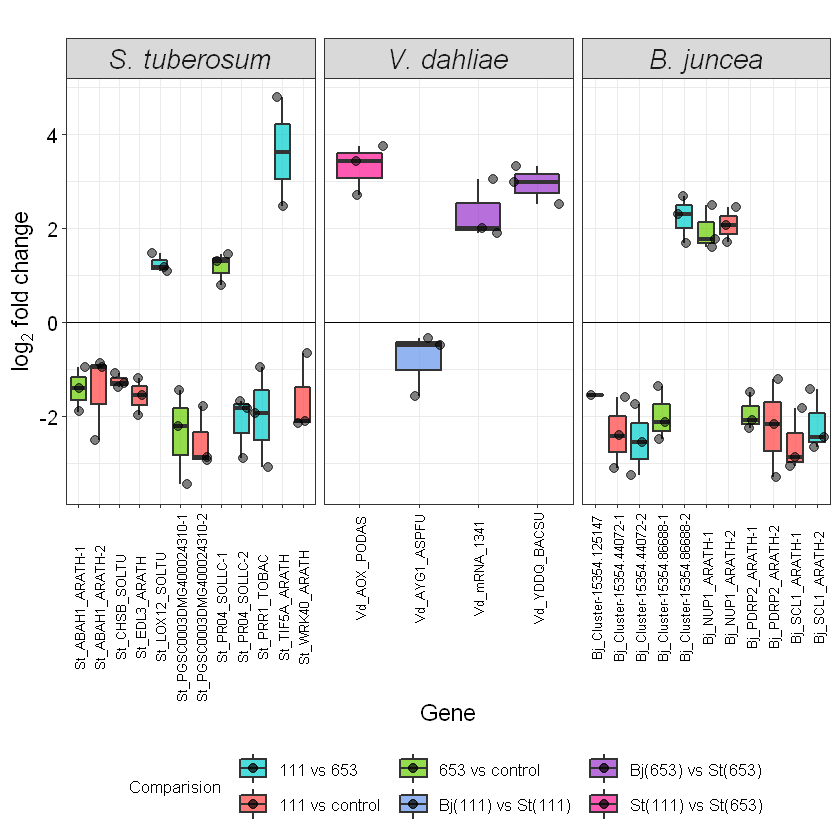

In [131]:
#tiff('Boxplot_qpcr.tiff',width=10,height=7,units='in',res=300)
Boxplot_qpcr = ggplot(df, aes(x= Gene, y= qPCR, fill = comparision))+
    geom_boxplot(aes(fill =comparision),alpha=0.7,lwd=0.6)+geom_hline(yintercept = 0)+
    geom_jitter(size=4,pch=20,alpha = 0.5)+
    theme_bw()+
    scale_fill_manual(values = c("cyan3", "brown1", "chartreuse3","cornflowerblue", "darkorchid", "deeppink"))+
     facet_grid(~Host, scales ='free')+
    labs(title ='', x = 'Gene', y =expression(log[2]~fold~change))+
    theme(axis.title.x= element_text(size =14, color ='black'),
    axis.title.y = element_text(size =14, color ='black'),
    axis.text.x = element_text(vjust =0.5, size =8,angle =90,color = 'black'),
    axis.text.y = element_text(size =12, color = 'black'),
    strip.text.x = element_text(size = 16, face = 'italic'),
    legend.text = element_text(size =10),
    legend.title = element_text(size =10),
    legend.key.size = unit(0.75, 'cm'))+
    theme(legend.position="bottom")+
    guides(fill = guide_legend('Comparision', override.aes = list(alpha =0.7))) 
Boxplot_qpcr
#dev.off()

In [132]:
df_summary <- df %>% 
                group_by (Gene, comparision, Host) %>% 
                summarise(Avg_qPCR = mean(qPCR), na.rm = T,
                          Avg_RNASeq = mean(RNASeq),
                          sd_qpcr = sd(qPCR), na.rm = T,
                          sd_rnaseq = sd(RNASeq))
df_summary<- df_summary[,c(-5,-8)]
cor(x=df_summary[,4], y=df_summary[,5])

`summarise()` regrouping output by 'Gene', 'comparision' (override with `.groups` argument)


,Avg_RNASeq
Avg_qPCR,0.9174427


#### Scatter plot

In [ ]:
tiff('scatterplot.tiff',width=5,height=5,units='in',res=300)
scatterplot<-ggplot(df_summary, aes(x = Avg_qPCR, y = Avg_RNASeq))+
  geom_point(aes(colour = Host), size = 3, pch =18, alpha =0.9)+
  geom_vline(xintercept = 0)+
  geom_hline(yintercept = 0)+
  geom_smooth(method = 'lm', se = T, alpha =0.15, size = 0.75)+
  scale_color_brewer (palette = 'Dark2')+
  labs(title ='', x =expression(log[2]~fold ~change~(qRT-PCR)) , y = expression(log[2]~fold ~change~(RNA-Seq)))+
  theme_gray()+theme(panel.grid.major=element_line(colour="white"))+
  theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          axis.title.x= element_text(size =10, color ='black', face ='bold'),
          axis.title.y = element_text(size =10, color ='black', angle = 90,, face ='bold'),
          axis.text.x = element_text(vjust =0.5, size =10,angle =1,color = 'black', face='bold'),
          axis.text.y = element_text(size =10, color = 'black', face ='bold'),
          legend.text = element_text(size =8, face ='italic'))+
          guides(color = guide_legend('Host'))+
            stat_cor(method = "pearson", label.x =2.66, label.y = 7)
scatterplot
dev.off() 

In [ ]:
tiff('scatterplot_separate.tiff',width=8,height=5,units='in',res=300)
scatterplot_separate<-ggplot(df_summary, aes(x = Avg_qPCR, y = Avg_RNASeq))+
  geom_point(aes(colour = comparision), size = 3, pch =18, alpha =0.9)+
  geom_vline(xintercept = 0)+
  geom_hline(yintercept = 0)+
  geom_smooth(method = 'lm', se = T, alpha =0.15, size = 0.75)+
  scale_color_brewer (palette = 'Dark2')+
  labs(title ='', x =expression(log[2]~fold ~change~(qRT-PCR)) , y = expression(log[2]~fold ~change~(RNA-Seq)))+
  theme_gray()+theme(panel.grid.major=element_line(colour="white"))+
  theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          axis.title.x= element_text(size =14, color ='black', face ='bold'),
          axis.title.y = element_text(size =14, color ='black', angle = 90,, face ='bold'),
          axis.text.x = element_text(vjust =0.5, size =12,angle =1,color = 'black', face='bold'),
          axis.text.y = element_text(size =12, color = 'black', face ='bold'),
          legend.text = element_text(size =12), 
          strip.text = element_text(size = 14, face = 'italic'))+
          guides(color = guide_legend('Comparision'))+
            stat_cor(method = "pearson", label.x =2.25, label.y = 7)+theme(legend.position="bottom")+ 
            facet_wrap(Host~., scales ='fixed')
scatterplot_separate
dev.off() 

In [133]:
df2<- gather(df_summary, method, foldchange, Avg_qPCR:Avg_RNASeq)

#### Lollipop chart

In [107]:
#tiff('lollipop.tiff',width=10,height=10,units='in',res=300)
lollipop<-ggplot(df2, aes(x = foldchange, y = Gene, color = Host, shape = method)) +
        geom_segment(aes(x = 0, y = Gene, xend = foldchange, yend = Gene)) +
        geom_point(stat='identity', fill="black", size=3)+ 
        geom_vline(xintercept = 0)+
        scale_colour_manual(values = c("deeppink", "blue", 'tomato'))+
       labs( title = "qRT-PCR vs RNA-Seq", x = 'Fold change', y = 'Gene')+
  theme_gray()+theme(panel.grid.major=element_line(colour="white"))+
  theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          axis.title.x= element_text(size =12, color ='black', face = 'bold'),
          axis.title.y = element_text(size =12, color ='black', angle = 90, face = 'bold'),
          axis.text.x = element_text(vjust =0.5, size =10,angle =1,color = 'black'),
          axis.text.y = element_text(size =9, color = 'black'))+
          guides(color = guide_legend('Host'),shape = guide_legend('Method'))
lollipop
#dev.off()

ERROR: Error in ggplot(df2, aes(x = foldchange, y = Gene, color = Host, shape = method)): object 'df2' not found


### Lollipop(RNAseq only)

In [135]:
head(df_summary)

Gene,comparision,Host,Avg_qPCR,Avg_RNASeq,sd_qpcr
Bj_Cluster-15354.125147,653 vs control,B. juncea,-1.540000,-5.7,NA
Bj_Cluster-15354.44072-1,111 vs control,B. juncea,-2.366667,-4.4,0.7559321
Bj_Cluster-15354.44072-2,111 vs 653,B. juncea,-2.513333,-4.9,0.7556675
Bj_Cluster-15354.86688-1,653 vs control,B. juncea,-1.990000,-6.2,0.5761076
Bj_Cluster-15354.86688-2,111 vs 653,B. juncea,2.226667,6.2,0.5101307
Bj_NUP1_ARATH-1,653 vs control,B. juncea,1.956667,3.0,0.4800347


In [172]:
tiff('lollipop_RNASeq.tiff',width=10,height=7,units='in',res=300)
lollipop_RNASeq<-ggplot(df_summary, aes(x = Avg_RNASeq, y = Gene,color = comparision)) +
        geom_segment(aes(x = 0, y = Gene, xend = Avg_RNASeq, yend = Gene), size =1.2) +
        geom_point(stat='identity', size=3)+ theme_bw()+
        geom_vline(xintercept = 0)+
        scale_fill_manual(values = c("cyan3", "brown1", "chartreuse3","cornflowerblue", "darkorchid", "deeppink"))+
       labs( title = "", x = expression(log[2]~fold ~change~(RNASeq)), y = 'Gene')+
  theme(panel.grid.major=element_line(colour="white"))+
  theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black', angle = 90 ),
          axis.text.x = element_text(vjust =0.5, size =9,angle =90,color = 'black'),
         strip.text.x = element_text(size = 16, face = 'italic'),
          axis.text.y = element_text(size =12, color = 'black'))+
          guides(shape = guide_legend('Comparision'))+theme(legend.position="bottom")+
facet_grid(~Host, scales ='free')+ coord_flip()
lollipop_RNASeq
dev.off()

png 
  2

In [179]:
tiff('expression.tiff',width=20,height=14,units='in',res=300)
expression<- ggarrange(Boxplot_qpcr, lollipop_RNASeq, labels = c("A", "B"), ncol =1)
expression
dev.off()

png 
  2

#### Bar graph

In [ ]:
#tiff('Bargraph.tiff',width=11,height=8,units='in',res=300)
Bargraph = ggplot(df1, aes(x= Gene, y= foldchange, fill = comparision))+
            geom_hline(yintercept = 0)+
        stat_summary(geom = "bar", fun = mean, position = "dodge", colour ='black') +
        stat_summary(geom = "errorbar", fun.data = mean_se, position = "dodge")+
       theme_bw()+
       labs(title ='', x = 'Gene',  y =expression(log[2]~fold~change))+
       theme(plot.title = element_text(size =12, face ="bold", color = 'black', hjust = 0.5),
          axis.title.x= element_text(size =14, color ='black'),
          axis.title.y = element_text(size =14, color ='black'),
          axis.text.x = element_text(vjust =0.5, size =10,angle =90,color = 'black'),
          axis.text.y = element_text(size =10, color = 'black'), 
          legend.text = element_text(size =12),
             strip.text = element_text(size = 15)) +
          guides(fill = guide_legend(''))+theme(legend.position="bottom")+
        facet_grid(method~Host, scales ='free',labeller = labeller (method =method.labs))
Bargraph
#dev.off()

* For report: 
    * Pick and expalin validated defense/susceptibility related genes and their importance in disease  management
    * Virulence genes of Verticillium and it's interaction with host
    * Why few genes were not validated?
    * 
     

## Folchange calculation by replications (*Solanum tuberosum*)

In [259]:
library("DESeq2")
library("DEFormats")
library("dplyr")
library("ggplot2")

In [260]:
DF<- read.csv('Solanum_reads.csv')#load read count data

In [261]:
DF_1 <- data.frame(DF[,-1], row.names = DF[,1])#change to dataframe
df = data.matrix(DF_1)

In [262]:
group = rep(c("653", "111", "Control"), each = 3) # create vector 'group'

In [263]:
dge = DGEList(df, group = group) #assign group


In [264]:
dds = as.DESeqDataSet(dge)# Set data in Deseqformat

  it appears that the last variable in the design formula, 'group',
  has a factor level, 'Control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').


In [265]:
dds <- dds[rowSums(counts(dds)) > 1, ]#exclude the count data if rowsum is less than 1

In [266]:
DESeq.ds<- estimateSizeFactors(dds)
sizeFactors(DESeq.ds)

S1_1_2_2  S1_1_2_3  S1_1_2_6  S1_2_2_1  S1_2_2_2  S1_2_2_4  S1_3_2_3  S1_3_2_4 
1.1785003 1.1339082 1.1187777 1.3294836 1.1438432 1.2676012 0.8336991 0.6239436 
 S1_3_2_5 
0.6970244

In [267]:
colData(DESeq.ds)

DataFrame with 9 rows and 4 columns
            group  lib.size norm.factors        sizeFactor
         <factor> <numeric>    <numeric>         <numeric>
S1_1_2_2      653  25518237            1   1.1785003352832
S1_1_2_3      653  25955750            1  1.13390822470835
S1_1_2_6      653  24465446            1  1.11877770220033
S1_2_2_1      111  28741125            1  1.32948356957981
S1_2_2_2      111  24851601            1  1.14384319268416
S1_2_2_4      111  28294179            1   1.2676012100265
S1_3_2_3  Control  17629462            1 0.833699051575236
S1_3_2_4  Control  13352444            1 0.623943604225657
S1_3_2_5  Control  15220193            1 0.697024434624298

In [ ]:
normalized_counts<- counts(DESeq.ds, normalized = TRUE)
normalized_counts

In [278]:
log_norm_counts <-  log2(normalized_counts + 1)


In [279]:
genes<- c("PGSC0003DMG400023922", "PGSC0003DMG402018475", "PGSC0003DMG400024310", "PGSC0003DMG400020999",
          "PGSC0003DMG400004259", "PGSC0003DMG400029620", "PGSC0003DMG400042481", "PGSC0003DMG400019824",
          "PGSC0003DMG400001178") #validated gene list

In [280]:
Solanum_norm_count<- (log_norm_counts)[genes,]#subset only validated genes

In [281]:
Solanum_norm_count

,S1_1_2_2,S1_1_2_3,S1_1_2_6,S1_2_2_1,S1_2_2_2,S1_2_2_4,S1_3_2_3,S1_3_2_4,S1_3_2_5
PGSC0003DMG400023922,6.719319,9.543438,7.926169,4.307741,5.302568,3.767895,4.775494,4.338603,4.892070
PGSC0003DMG402018475,6.841770,6.359931,6.672469,6.570182,6.549516,6.889289,9.761916,10.155484,9.465276
PGSC0003DMG400024310,5.650049,3.830720,5.052154,6.335037,4.812581,6.494172,9.481167,10.163570,10.456911
PGSC0003DMG400020999,12.031057,11.785250,12.964962,14.366406,14.154987,14.854704,11.907535,11.407262,13.031408
PGSC0003DMG400004259,11.651098,12.600698,13.072612,9.444516,10.437419,9.896623,10.374624,10.215056,9.841964
PGSC0003DMG400029620,8.791447,7.554312,8.033418,6.752326,7.274888,7.069559,9.945104,10.449729,10.190839
PGSC0003DMG400042481,5.468431,5.908997,6.215179,4.361520,4.514510,4.989447,7.653290,7.826434,7.657167
PGSC0003DMG400019824,5.744410,7.974192,7.354713,4.886673,5.168715,5.337875,9.652213,8.760658,8.519010
PGSC0003DMG400001178,3.245703,3.830720,3.026917,6.772318,4.719902,7.281909,4.247328,2.538073,5.087353


In [282]:
Solanum_trt = c('653-1', '653-2','653-3','111-1','111-2','111-3','control-1','control-2','control-3')

In [283]:
colnames(Solanum_norm_count)<- Solanum_trt

In [284]:
write.csv(Solanum_norm_count,'C:/Users/sudha.gcupadhaya/Desktop/RNA-seq/qPCR validation/Solanum.csv' )

##### Tried to calculate foldchage by replicates in normalized data manually but it doesn't produce same foldchange values as DESeq2 does. DSEq2 uses regression model to every single gene to estimate fold change following: $Y = b0+b1*x+e$ (Love et al. 2014)

# References